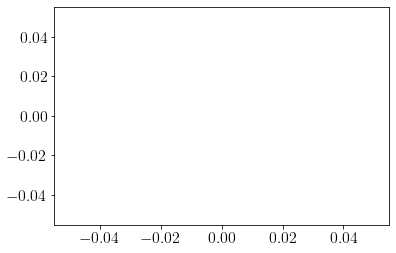

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt

import econtools
from econtools.documents import Homework, RawLatex
from utils import Monopoly
from utils import cbeq, polyeq, term, is_divisible, Number

rng = np.random.default_rng(100)

plt.plot()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

filename = "econ-310-hw11"

doc = Homework(
    title = r"Econ 310 Week 11 Homework",
    due_date = r"Tuesday 11/12"
)


In [2]:
df = pd.read_csv("Monopoly_examples.csv")
idx = (df['delta']>0) & (df['eta']>0)
params = dict(df.loc[idx].sample(1,random_state=rng).reset_index(drop=True).loc[0])
alpha, beta, gamma, delta, eta = params['alpha'], params['beta'], params['gamma'], params['delta'], params['eta']
prob = Monopoly(params)
question = fr"""
A commodity $q$ is supplied by a monopolist with cost function: 

$$c(q) = {polyeq('q',[gamma,delta,0.5*eta],[0,1,2])} $$

The monopolist faces a market demand curve given by:

$$Q_d = {polyeq('p',[Number(alpha,beta), Number(-1,beta)],[0,1])} $$

Find the profit maximizing price and quantity. What is the maximum profit?
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))

display(Latex(question))
print(prob.sol)

<IPython.core.display.Latex object>

{'Q': 4.0, 'p': 20.0, 'U': 116.0, 'Profit': 16.0, 'c': 20.0, 'Q_eff': 6.0, 'p_eff': 16.0, 'U_eff': 136.0, 'Profit_eff': 4.0, 'c_eff': 4.0, 'DWL': 8.0}


In [3]:
idx = (df['eta']==0) & (df['gamma']>df['delta'])
params = dict(df.loc[idx].sample(1,random_state=rng).reset_index(drop=True).loc[0])
alpha, beta, gamma, delta, eta = params['alpha'], params['beta'], params['gamma'], params['delta'], params['eta']
prob = Monopoly(params)
question = prob.setup()
question += fr"""
\begin{{enumerate}}[a.]
\item Write down the demand curve faced by the monopolist.
\item Find the profit maximizing price and quantity. Calculate firm profit and consumer utility at this point.
\item What is the efficient quantity? Calculate price, firm profit, and consumer utility at the efficient quantity.
\item What is the deadweight loss caused by the monopoly?
\end{{enumerate}}
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))

display(Latex(question))
print(prob.sol)

<IPython.core.display.Latex object>

{'Q': 4.0, 'p': 16.0, 'U': 116.0, 'Profit': 10.0, 'c': 36.0, 'Q_eff': 8.0, 'p_eff': 8.0, 'U_eff': 164.0, 'Profit_eff': -22.0, 'c_eff': 36.0, 'DWL': 16.0}


In [4]:
doc.print_pdf(filename, "tex")